In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as calc_mse

In [5]:
#import the data (cleaned)
salaries = pd.read_csv("salaries_cleaned.csv")

#the dataset is too large (over 60k rows)
#we decided to take a smaller sample to make the runtimes more managable

salaries = salaries.sample(fracC= 0.05, replace = True, random_state = 1)


FileNotFoundError: [Errno 2] No such file or directory: 'salaries_cleaned.csv'

In [3]:
x = salaries[['company','title', 'yearsofexperience']]
y = salaries['totalyearlycompensation']

x = x.astype({"title" : "category",
             'company' : 'category'})

#create model
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)
x_train = x_train.copy()
x_test = x_test.copy()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 4720 to 17823
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            2158 non-null   category
 1   title              2158 non-null   category
 2   yearsofexperience  2158 non-null   float64 
dtypes: category(2), float64(1)
memory usage: 61.3 KB


In [4]:
#scale the years of experience

#train data
scaler = StandardScaler()
scaler.fit(x_train[['yearsofexperience']])
x_train[['yearsofexperience']] = scaler.transform(x_train[['yearsofexperience']])
x_train = x_train.reset_index()
x_train = x_train.drop(columns = 'index')

display(x_train.head())
display(x_train.tail())

,company,title,yearsofexperience
0,JPMorgan Chase,Software Engineer,-0.926308
1,Wayfair,Product Manager,-0.751174
2,Wayfair,Software Engineer,-0.926308
3,Blend,Software Engineer,-0.400908
4,Salesforce,Software Engineer,0.124492


,company,title,yearsofexperience
2153,Deloitte,Human Resources,-0.400908
2154,Uber,Software Engineer,-1.101441
2155,Splunk,Software Engineer,-0.225774
2156,Facebook,Software Engineer,-0.576041
2157,Oath,Software Engineer,-0.225774


In [5]:
#encode the categorical feature
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #drop one of the encoded gender columns
encoder.fit(x_train[['company', 'title']])

temp = encoder.transform(x_train[['company', 'title']])
temp = pd.DataFrame(temp)
#combine the two dataframes
#since both dataframes are in the same order 
#we can combine horizontally, where axis = 1
x_train2 = pd.concat([temp, x_train[['yearsofexperience']]], ignore_index = False, axis = 1)
display(x_train2.head())
x_train = x_train2

,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,yearsofexperience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.926308
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751174
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.926308
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.400908
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.124492


In [6]:
#test data
x_test[['yearsofexperience']] = scaler.transform(x_test[['yearsofexperience']])
x_test = x_test.reset_index()
x_test = x_test.drop(columns = 'index')
display(x_test.head(3))
display(x_test.tail(3))

,company,title,yearsofexperience
0,Amazon,Software Engineer,-1.101441
1,Intel,Software Engineer,1.350426
2,Geico,Software Engineer,-1.101441


,company,title,yearsofexperience
922,Amazon,Marketing,-0.050641
923,Expedia,Software Engineer,-0.225774
924,Amazon,Data Scientist,-0.576041


In [7]:
#rinse and repeat for testing data
temp = encoder.transform(x_test[['company', 'title']])
temp = pd.DataFrame(temp)
#combine the two dataframes
#since both dataframes are in the same order 
#we can combine horizontally, where axis = 1
x_train2 = pd.concat([temp, x_test[['yearsofexperience']]], ignore_index = False, axis = 1)
display(x_train2.head(3))
display(x_train2.tail(3))
x_test = x_train2

,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,yearsofexperience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.101441
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.350426
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.101441


,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,yearsofexperience
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.050641
923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.225774
924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.576041


**Algorithm #1:** Support Vector Machine

In [8]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print('The accuracy of the model is: {}'.format(svm.score(x_test, y_test)))


The accuracy of the model is: 0.03135135135135135


In [ ]:
#run only if computer is good!
params = {'C': np.arange(1, 10),
         'gamma' : np.arange(1,5)}

#cross validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv = 5, return_train_score = True)
svm_grid.fit(x_train, y_train)

print("The best parameters were: {}".format(svm_grid.best_params_))
print("The best score was: {}".format(svm_grid.best_score_))

This model is not a good predictor of our dataset. This is apparent in its low accuracy rate (1.08%) and low best score. We will be trying other models to predict the data. 

**Algorithm #2:** Random Forest Regressor

In [9]:
x = salaries[['yearsofexperience']]
y = salaries['totalyearlycompensation']

#create model
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)
x_train = x_train.copy()
x_test = x_test.copy()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 4720 to 17823
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yearsofexperience  2158 non-null   float64
dtypes: float64(1)
memory usage: 33.7 KB


In [10]:
for i in range(100, 300, 50):
    rf = RandomForestRegressor(random_state = 7, n_estimators = i)
    rf.fit(x_train, y_train)
    y_pred = list(rf.predict(x_test))
    mse = calc_mse(y_test, y_pred)
    print("When there are", i, "estimators, the mse is", mse ** 0.5)

print("The root-MSE is very large because our dataset's values are large. This is someting we are taking into consideration as we proceed.")

When there are 100 estimators, the mse is 115693.69013203088
When there are 150 estimators, the mse is 115809.18452311233
When there are 200 estimators, the mse is 115650.05018053677
When there are 250 estimators, the mse is 115723.83016812896
The root-MSE is very large because our dataset's values are large. This is someting we are taking into consideration as we proceed.


For this Random Forest algorithm, we chose to eliminate some of the other x-variables. We only left "yearsofexperience", which we deemed to be the most important. We made this decision because we know the runtime of this algorithm is O(n-squared), which means that the algorithm would take a long time to run. However, we noted that the mse was decreasing with each increase of estimators, meaning that the model was getting better. 

**Algorithm #3:** k-Nearest Neighbors

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 4720 to 17823
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yearsofexperience  2158 non-null   float64
dtypes: float64(1)
memory usage: 33.7 KB


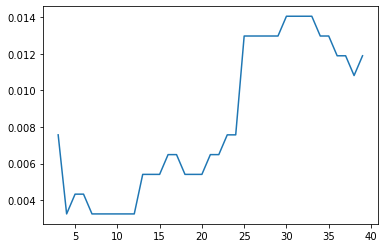

In [11]:
x = salaries[['yearsofexperience']]
y = salaries['totalyearlycompensation']

#create model
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)
x_train = x_train.copy()
x_test = x_test.copy()
x_train.info()

pred = {}

for i in range(3, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred[i] = knn.score(x_test, y_test)

sns.lineplot(x = pred.keys(), y = pred.values())
plt.show()

As the line plot above shows, the accuracy is highest between k = 31 and 34. The high is around 0.014, which is the maximum accuracy we can achieve. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

Here, we see the classification report. We can see that the model is not a good model because of its extremely low statistics, such as precision, recall, and f1-score. This is likely because the data is not clustered, so k-NN is not a good model to use. 

**Algorithm #4**: The good old graph

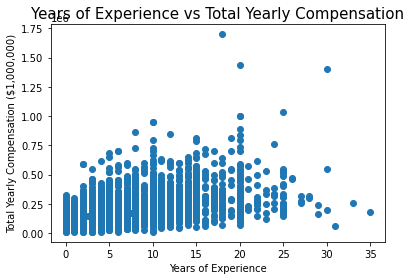

In [13]:
plt.xlabel("Years of Experience")
plt.ylabel("Total Yearly Compensation ($1,000,000)")
plt.title("Years of Experience vs Total Yearly Compensation", fontsize = 15)
plt.scatter(salaries['yearsofexperience'], salaries['totalyearlycompensation'])
plt.show()

As the graph shows there is only a slight, positive trend between the years of experience and the total yearly compensation.

**Algorithm #5:** Linear Regression


In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

predictions = lm.predict(x_test)

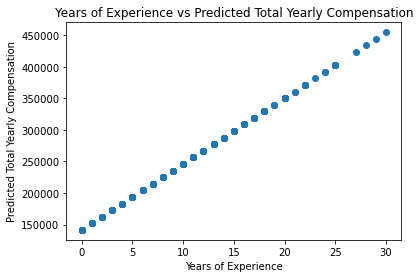

In [15]:
plt.xlabel("Years of Experience")
plt.ylabel("Predicted Total Yearly Compensation")
plt.title("Years of Experience vs Predicted Total Yearly Compensation", fontsize = 12)
plt.scatter(x_test, predictions)
plt.show()

In [16]:
m = calc_mse(y_test, predictions)
rmse = m ** 0.5
print("The root mean squared error for the linear model is:", rmse)

The root mean squared error for the linear model is: 113559.72221753765


The linear model is a good fit, because the mean squared error is low, compared to the values we are looking for. Since the mean squared error is lower than that of the Random Forest Regression, this model is our best model. 